#Problem Statement : How have socio-economic, demographic, and regional factors historically, influenced the likelihood of individuals having health insurance in the United States, and which factors can be leveraged to reduce coverage disparities?

In [36]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FixedLocator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm


In [3]:
# Load the dataset
file_path = 'HealthInsurance.csv'  # Update the file path if necessary
health_insurance_data = pd.read_csv(file_path)

In [4]:
# Preprocess and encode the data
# Drop the 'rownames' column as it is not relevant for analysis
health_insurance_data = health_insurance_data.drop(columns=['rownames'])


## Descriptive Analysis:
Q1.	How is health insurance coverage distributed across socio-demographic factors such as age, gender, marital status, and region?

Q2.	How do education, family size, and self-employment affect the likelihood of being insured or uninsured?

Q3.	What key socio-economic and demographic factors are most associated with individuals being uninsured? 


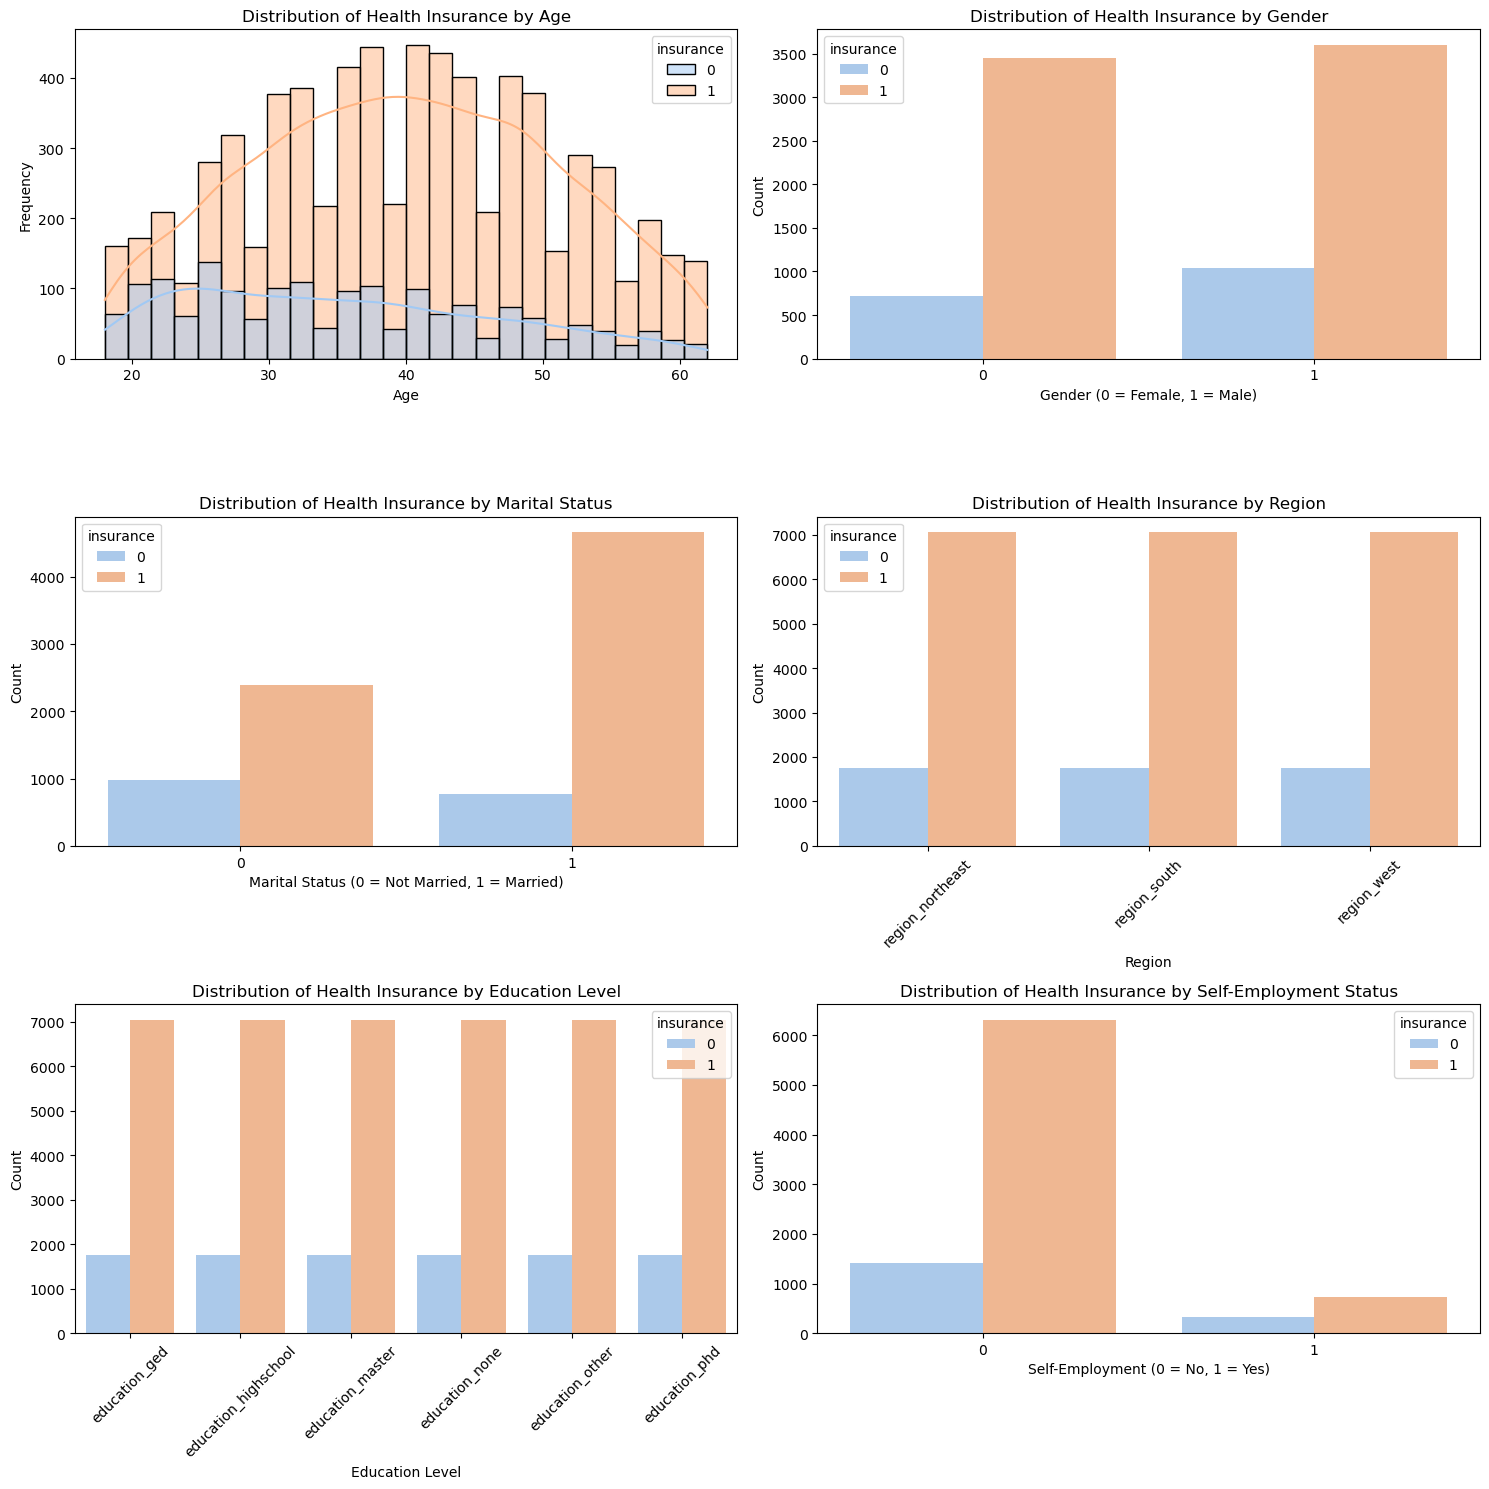

In [37]:

# Encode categorical variables as numeric for analysis
binary_columns = ['insurance', 'limit', 'gender', 'married', 'selfemp']
label_encoders = {col: LabelEncoder() for col in binary_columns}

# Fit the label encoders and transform the data
for col, encoder in label_encoders.items():
    health_insurance_data[col] = encoder.fit_transform(health_insurance_data[col])

# Set up plots for different demographics
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# 1. Distribution of health insurance by age
sns.histplot(health_insurance_data, x='age', hue='insurance', kde=True, ax=axes[0], palette='pastel')
axes[0].set_title('Distribution of Health Insurance by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# 2. Distribution of health insurance by gender
sns.countplot(x='gender', hue='insurance', data=health_insurance_data, palette='pastel', ax=axes[1])
axes[1].set_title('Distribution of Health Insurance by Gender')
axes[1].set_xlabel('Gender (0 = Female, 1 = Male)')
axes[1].set_ylabel('Count')

# 3. Distribution of health insurance by marital status
sns.countplot(x='married', hue='insurance', data=health_insurance_data, palette='pastel', ax=axes[2])
axes[2].set_title('Distribution of Health Insurance by Marital Status')
axes[2].set_xlabel('Marital Status (0 = Not Married, 1 = Married)')
axes[2].set_ylabel('Count')

# 4. Distribution of health insurance by region
# Check if 'region_' columns exist
region_cols = [col for col in health_insurance_data.columns if 'region' in col.lower()]
if region_cols:  # Proceed only if region columns exist
    region_data = health_insurance_data[['insurance'] + region_cols].melt(id_vars='insurance')
    sns.countplot(x='variable', hue='insurance', data=region_data, ax=axes[3], palette='pastel')
    axes[3].set_title('Distribution of Health Insurance by Region')
    axes[3].set_xlabel('Region')
    axes[3].set_ylabel('Count')
    
    # Set fixed tick positions and labels for regions
    region_positions = range(len(region_cols))
    axes[3].xaxis.set_major_locator(FixedLocator(region_positions))
    axes[3].set_xticklabels(region_cols, rotation=45)
else:
    axes[3].set_visible(False)

# 5. Distribution of health insurance by education
education_cols = [col for col in health_insurance_data.columns if 'education' in col.lower()]
education_data = health_insurance_data[['insurance'] + education_cols].melt(id_vars='insurance')
sns.countplot(x='variable', hue='insurance', data=education_data, ax=axes[4], palette='pastel')
axes[4].set_title('Distribution of Health Insurance by Education Level')
axes[4].set_xlabel('Education Level')
axes[4].set_ylabel('Count')

# Set fixed tick positions and labels for education levels
education_positions = range(len(education_cols))
axes[4].xaxis.set_major_locator(FixedLocator(education_positions))
axes[4].set_xticklabels(education_cols, rotation=45)

# 6. Distribution of health insurance by self-employment status
sns.countplot(x='selfemp', hue='insurance', data=health_insurance_data, palette='pastel', ax=axes[5])
axes[5].set_title('Distribution of Health Insurance by Self-Employment Status')
axes[5].set_xlabel('Self-Employment (0 = No, 1 = Yes)')
axes[5].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.savefig("distribution_by_demographic_variables.png", dpi=300)
plt.show()


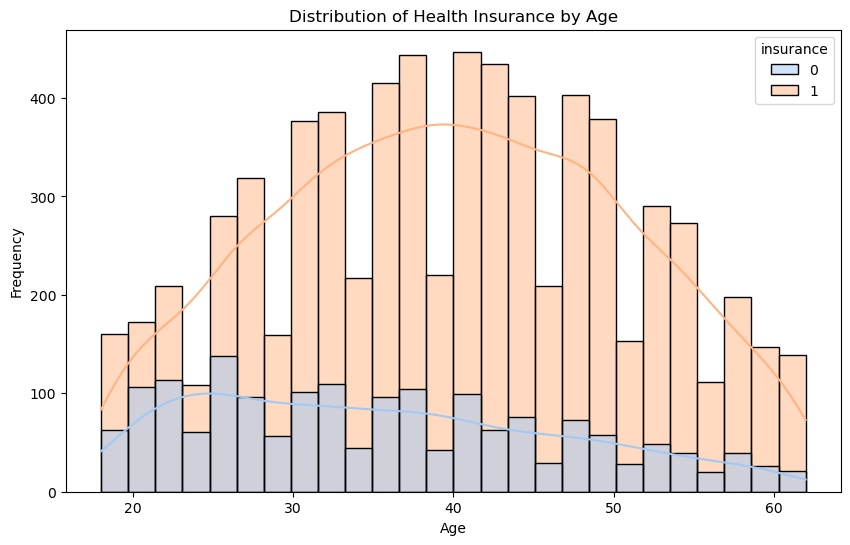

In [29]:
# 1. Distribution of health insurance by Age
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
health_insurance_data = pd.read_csv('HealthInsurance.csv')

# Encode categorical variables as numeric for analysis
binary_columns = ['insurance', 'limit', 'gender', 'married', 'selfemp']
label_encoders = {col: LabelEncoder() for col in binary_columns}
for col, encoder in label_encoders.items():
    health_insurance_data[col] = encoder.fit_transform(health_insurance_data[col])

# Plot: Distribution of health insurance by age
plt.figure(figsize=(10, 6))
sns.histplot(health_insurance_data, x='age', hue='insurance', kde=True, palette='pastel')
plt.title('Distribution of Health Insurance by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('upd_dist_by_age')
plt.show()


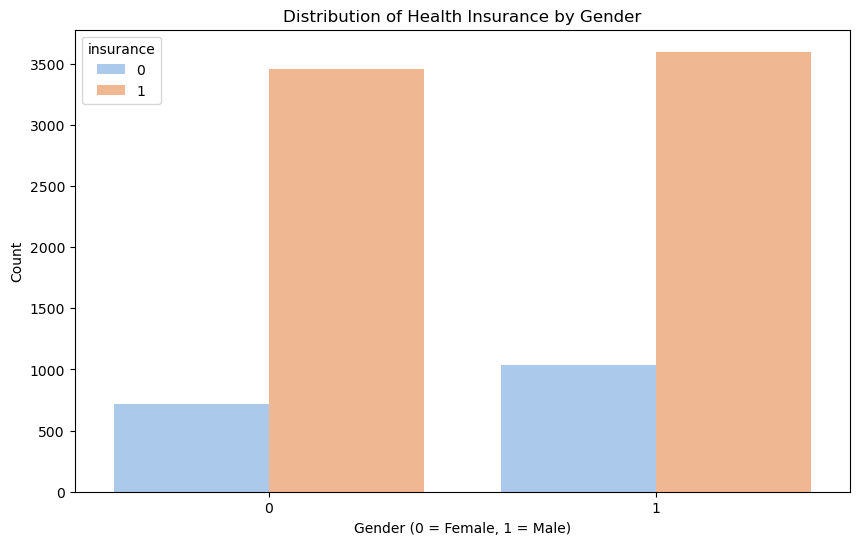

In [38]:

# Encode categorical variables as numeric for analysis
binary_columns = ['insurance', 'limit', 'gender', 'married', 'selfemp']
label_encoders = {col: LabelEncoder() for col in binary_columns}
for col, encoder in label_encoders.items():
    health_insurance_data[col] = encoder.fit_transform(health_insurance_data[col])

# Plot: Distribution of health insurance by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='insurance', data=health_insurance_data, palette='pastel')
plt.title('Distribution of Health Insurance by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


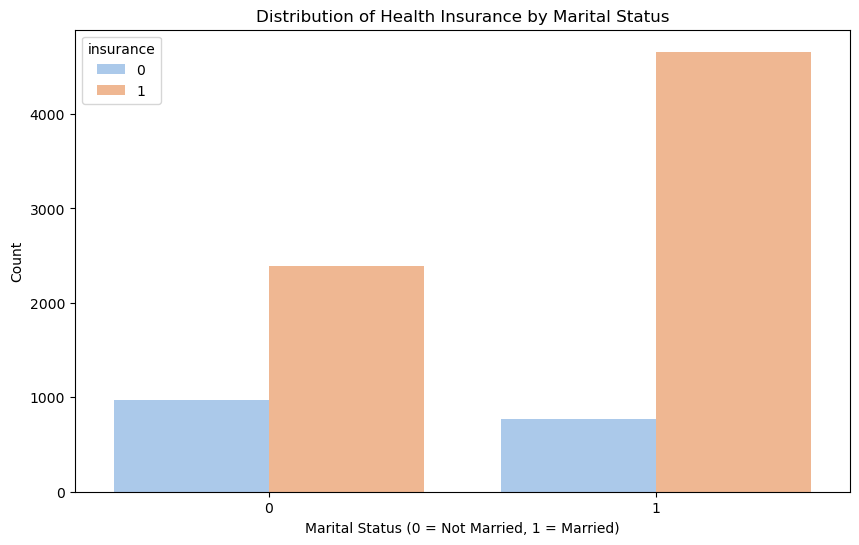

In [9]:
# 3. Distribution of health insurance by marital status
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
health_insurance_data = pd.read_csv('HealthInsurance.csv')

# Encode categorical variables as numeric for analysis
binary_columns = ['insurance', 'limit', 'gender', 'married', 'selfemp']
label_encoders = {col: LabelEncoder() for col in binary_columns}
for col, encoder in label_encoders.items():
    health_insurance_data[col] = encoder.fit_transform(health_insurance_data[col])

# Plot: Distribution of health insurance by marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='married', hue='insurance', data=health_insurance_data, palette='pastel')
plt.title('Distribution of Health Insurance by Marital Status')
plt.xlabel('Marital Status (0 = Not Married, 1 = Married)')
plt.ylabel('Count')
plt.show()


In [40]:


# Encode categorical variables as numeric for analysis
binary_columns = ['insurance', 'limit', 'gender', 'married', 'selfemp']
label_encoders = {col: LabelEncoder() for col in binary_columns}
for col, encoder in label_encoders.items():
    health_insurance_data[col] = encoder.fit_transform(health_insurance_data[col])

# Plot: Distribution of health insurance by education level (based on the 'education' column)
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='insurance', data=health_insurance_data, palette='pastel')
plt.title('Distribution of Health Insurance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to ensure labels fit well
plt.show()




ValueError: Could not interpret value `education` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

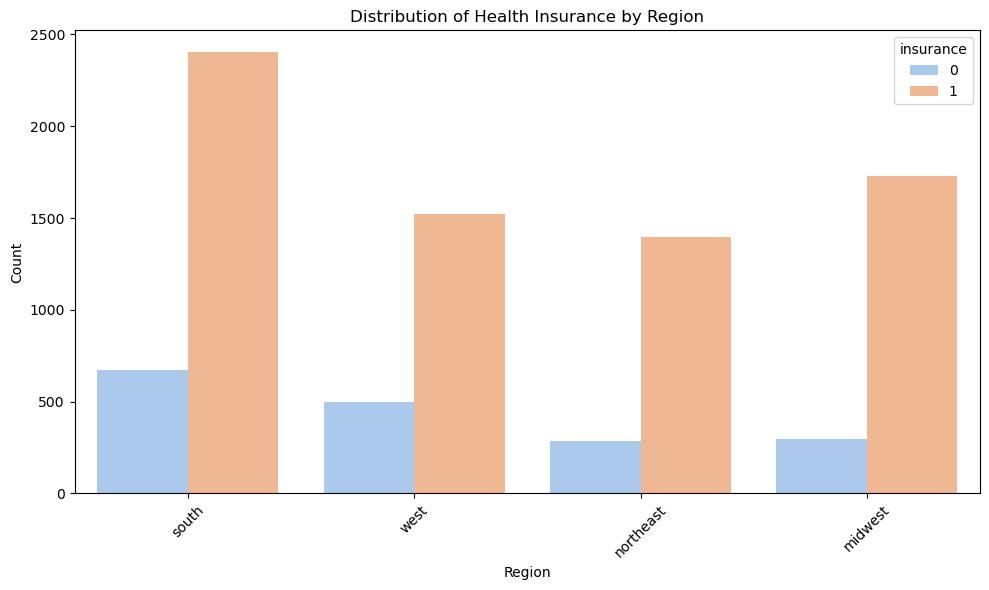

In [30]:
# 8. Distribution of health insurance by Education
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
health_insurance_data = pd.read_csv('HealthInsurance.csv')

# Encode categorical variables as numeric for analysis
binary_columns = ['insurance', 'limit', 'gender', 'married', 'selfemp']
label_encoders = {col: LabelEncoder() for col in binary_columns}
for col, encoder in label_encoders.items():
    health_insurance_data[col] = encoder.fit_transform(health_insurance_data[col])

# Plot: Distribution of health insurance by region (based on the 'region' column)
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='insurance', data=health_insurance_data, palette='pastel')
plt.title('Distribution of Health Insurance by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to ensure labels fit well
plt.savefig('upd_dist_by_region')
plt.show()


In [31]:
#Diagnostic Analysis:
#Q1-What factors are most associated with individuals not having health insurance?

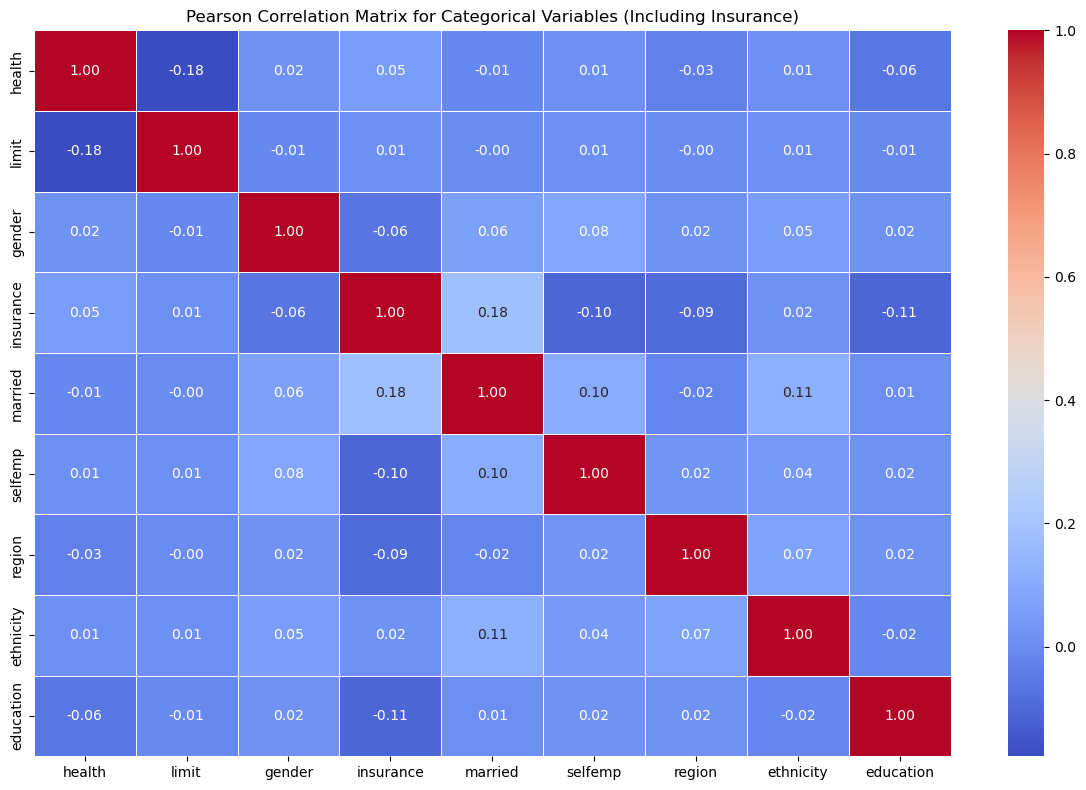

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'HealthInsurance.csv'
health_insurance_data = pd.read_csv(file_path)

# Define the categorical columns that need to be encoded (including 'insurance')
categorical_columns = ['health', 'limit', 'gender', 'insurance', 'married', 'selfemp', 'region', 'ethnicity', 'education']

# Initialize LabelEncoder for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply Label Encoding to categorical columns
for col, encoder in label_encoders.items():
    health_insurance_data[col] = encoder.fit_transform(health_insurance_data[col])

# Ensure 'insurance' is included in the columns for correlation
# Compute the Pearson correlation matrix (including 'insurance')
correlation_matrix = health_insurance_data[categorical_columns].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix for Categorical Variables (Including Insurance)')
plt.tight_layout()
plt.show()



## Logistics Regression 

In [15]:

# Load the dataset (path has already been set)
df = pd.read_csv('HealthInsurance.csv')

# Display the first few rows and column names for confirmation
print(df.head())
print(df.columns)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

# Encode 'gender', 'married', 'selfemp', 'region', 'ethnicity', and 'education'
df['gender'] = label_encoder.fit_transform(df['gender'])
df['married'] = label_encoder.fit_transform(df['married'])
df['selfemp'] = label_encoder.fit_transform(df['selfemp'])
df['region'] = label_encoder.fit_transform(df['region'])
df['ethnicity'] = label_encoder.fit_transform(df['ethnicity'])
df['education'] = label_encoder.fit_transform(df['education'])

# Features (independent variables)
X = df[['age', 'gender', 'married', 'selfemp', 'family', 'region', 'ethnicity', 'education']]  # All features

# Target variable (dependent variable)
y = df['insurance'].map({'yes': 1, 'no': 0})  # Convert 'yes' to 1 and 'no' to 0

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"\nAccuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Optionally, display predictions vs actual
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print("\nPredictions (Actual vs Predicted):")
print(predictions.head())


   rownames health  age limit  gender insurance married selfemp  family  \
0         1    yes   31    no    male       yes     yes     yes       4   
1         2    yes   31    no  female       yes     yes      no       4   
2         3    yes   54    no    male       yes     yes      no       5   
3         4    yes   27    no    male       yes      no      no       5   
4         5    yes   39    no    male       yes     yes      no       5   

  region ethnicity   education  
0  south      cauc    bachelor  
1  south      cauc  highschool  
2   west      cauc         ged  
3   west      cauc  highschool  
4   west      cauc        none  
Index(['rownames', 'health', 'age', 'limit', 'gender', 'insurance', 'married',
       'selfemp', 'family', 'region', 'ethnicity', 'education'],
      dtype='object')

Accuracy: 0.8171493469619534
Confusion Matrix:
[[  25  302]
 [  20 1414]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.0

#Logistic Regression with Accuracy Assessment

Optimization terminated successfully.
         Current function value: 0.425855
         Iterations 7

Logistic Regression Summary:

                           Logit Regression Results                           
Dep. Variable:              insurance   No. Observations:                 7041
Model:                          Logit   Df Residuals:                     7022
Method:                           MLE   Df Model:                           18
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.1462
Time:                        17:03:15   Log-Likelihood:                -2998.4
converged:                       True   LL-Null:                       -3511.9
Covariance Type:            nonrobust   LLR p-value:                1.203e-206
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1059      0.236      4.689    

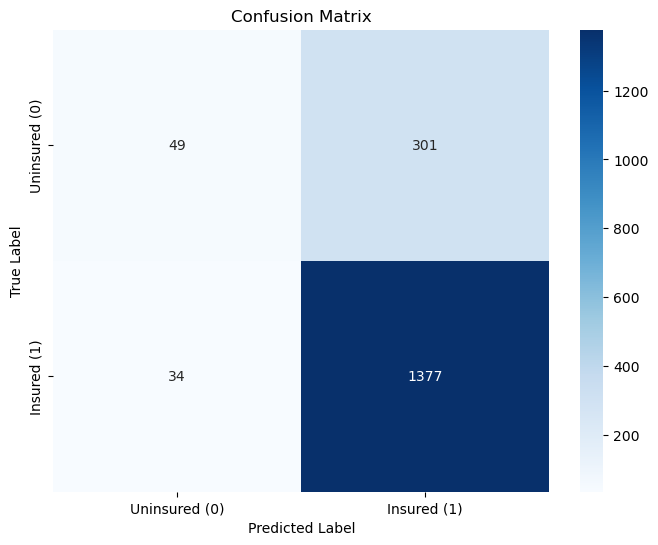


ROC-AUC Score: 0.7472127164118659


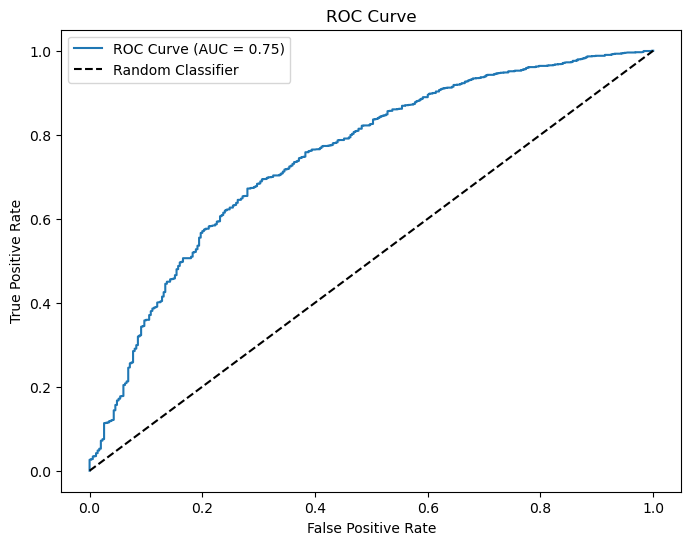

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import statsmodels.api as sm

# Load the dataset
file_path = 'HealthInsurance.csv'  # Replace with your dataset path
health_insurance_data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Drop unnecessary columns
if 'rownames' in health_insurance_data.columns:
    health_insurance_data = health_insurance_data.drop(columns=['rownames'])

# Encode categorical variables
binary_columns = ['health', 'limit', 'gender', 'insurance', 'married', 'selfemp']
label_encoders = {col: LabelEncoder() for col in binary_columns}

for col in binary_columns:
    health_insurance_data[col] = label_encoders[col].fit_transform(health_insurance_data[col])

# Apply one-hot encoding to multi-class columns
health_insurance_data = pd.get_dummies(health_insurance_data, columns=['region', 'ethnicity', 'education'], drop_first=True)

# Define features (X) and target variable (y)
X = health_insurance_data.drop(columns=['insurance'])
y = health_insurance_data['insurance']

# Convert boolean columns to integers
X = X.astype(int)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train Logistic Regression Model
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print("\nLogistic Regression Summary:\n")
print(logit_model.summary())

# Step 4: Make Predictions
# Predict probabilities
y_pred_prob = logit_model.predict(sm.add_constant(X_test))

# Convert probabilities to binary predictions
threshold = 0.5  # Default threshold
y_pred = (y_pred_prob >= threshold).astype(int)

# Step 5: Evaluate the Model
# (a) Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# (b) Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# (c) Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninsured (0)', 'Insured (1)'], yticklabels=['Uninsured (0)', 'Insured (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# (d) ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('upd_conf_mat_lg')
plt.show()


In [17]:
#The logistic regression model achieved an accuracy of 81.7%, with strong performance for the insured class, having a 99% recall and 82% precision. 
#However, it struggled with predicting the uninsured class, which had a very low 8% recall and 56% precision, leading to a poor F1-score of 0.13 for the not insured class. 
#This imbalance is likely due to the class distribution, where the model is biased towards predicting insured individuals. 
#While the overall accuracy is good, improving the prediction for the uninsured class could be achieved by addressing class imbalance through techniques like class weighting or resampling.

## Gradient Boosting (SMOTE)

Accuracy: 0.7909
ROC-AUC Score: 0.8638

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1412
           1       0.79      0.80      0.79      1409

    accuracy                           0.79      2821
   macro avg       0.79      0.79      0.79      2821
weighted avg       0.79      0.79      0.79      2821



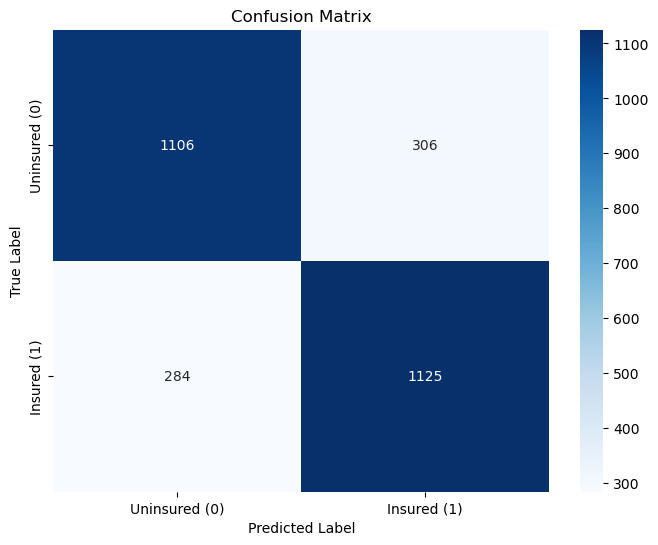

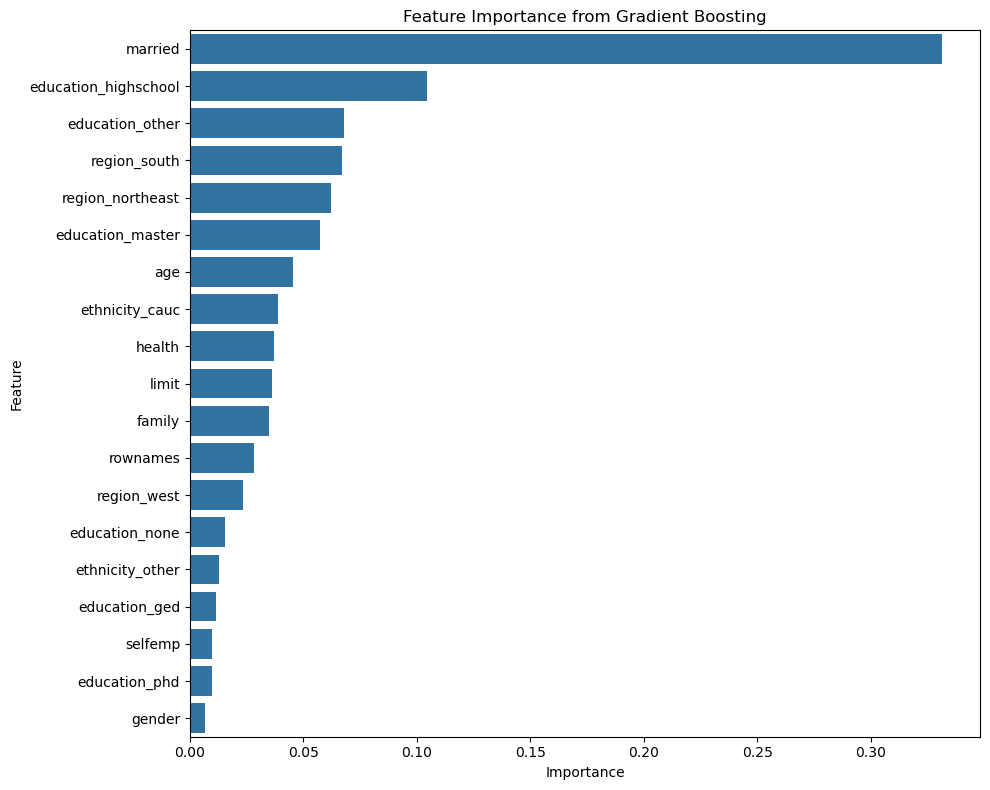

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'HealthInsurance.csv'  # Update with your dataset path
health_insurance_data = pd.read_csv(file_path)

# Preprocess the dataset
binary_columns = ['health', 'limit', 'gender', 'insurance', 'married', 'selfemp']
for col in binary_columns:
    health_insurance_data[col] = LabelEncoder().fit_transform(health_insurance_data[col])

health_insurance_data = pd.get_dummies(health_insurance_data, columns=['region', 'ethnicity', 'education'], drop_first=True)

# Define features (X) and target variable (y)
X = health_insurance_data.drop(columns=['insurance'])  # Predicting insurance status
y = health_insurance_data['insurance']  # Target: insurance (0 = Uninsured, 1 = Insured)


# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninsured (0)', 'Insured (1)'], yticklabels=['Uninsured (0)', 'Insured (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, errorbar=None)  # Removed palette and set errorbar=None
plt.title("Feature Importance from Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("Ranked_factors")
plt.tight_layout()
plt.show()


## Clustering (EDA)

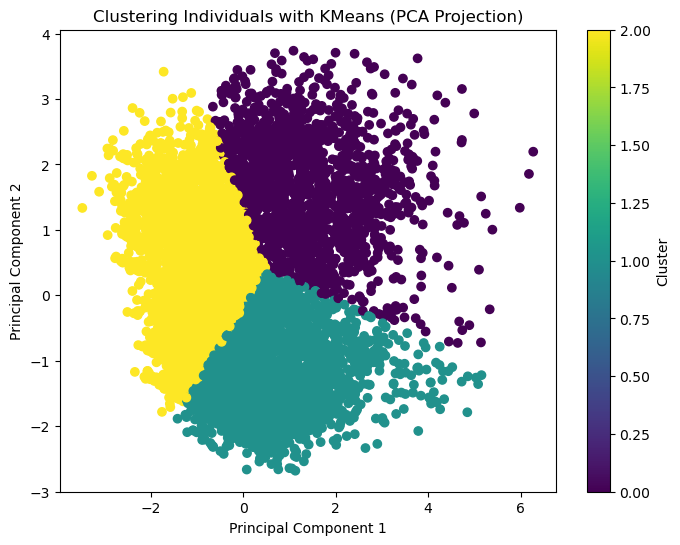

C:\Users\hp\AppData\Local\Temp\ipykernel_17680\3222032694.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_health_coverage_by_cluster.index, y=avg_health_coverage_by_cluster.values, palette='coolwarm')


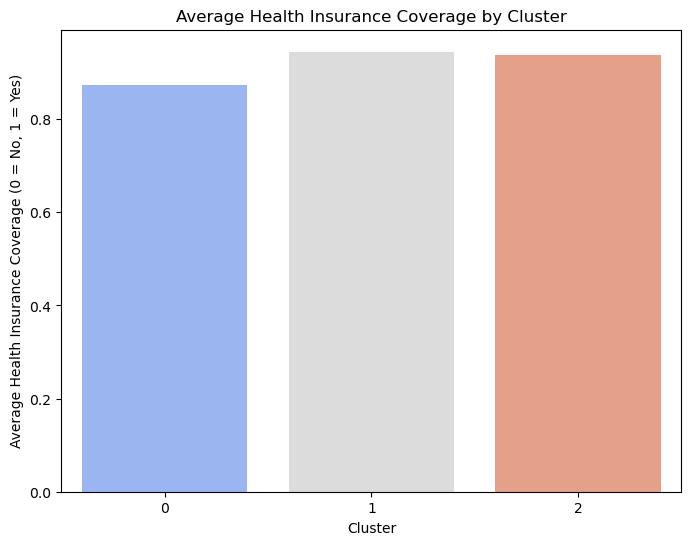

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'HealthInsurance.csv'  # Replace with your dataset path
health_insurance_data = pd.read_csv(file_path)

# Preprocess the dataset
binary_columns = ['health', 'limit', 'gender', 'insurance', 'married', 'selfemp']
for col in binary_columns:
    health_insurance_data[col] = LabelEncoder().fit_transform(health_insurance_data[col])

health_insurance_data = pd.get_dummies(health_insurance_data, columns=['region', 'ethnicity', 'education'], drop_first=True)

# Define features (X) and target variable (y)
X = health_insurance_data.drop(columns=['health'])
y = health_insurance_data['health']

# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Apply KMeans clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Step 3: Visualize the clusters in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Individuals with KMeans (PCA Projection)')
plt.colorbar(label='Cluster')
plt.show()

# Step 4: Plot the average health insurance coverage by cluster
# Add the cluster labels to the original data for further analysis
health_insurance_data['Cluster'] = y_kmeans
avg_health_coverage_by_cluster = health_insurance_data.groupby('Cluster')['health'].mean()

# Barplot of average health insurance coverage by cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_health_coverage_by_cluster.index, y=avg_health_coverage_by_cluster.values, palette='coolwarm')
plt.title('Average Health Insurance Coverage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Health Insurance Coverage (0 = No, 1 = Yes)')
plt.show()
